# K-Means Tutorial

Load the modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

C:\Users\hp\.conda\envs\AI\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\.conda\envs\AI\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\hp\.conda\envs\AI\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Load the data
from kmeans.csv

In [2]:
f = open("kmeans.csv")
data = np.loadtxt(f, delimiter='\t')
print(data)

[[ 67.9487  34.5513]
 [ 33.3333  37.6282]
 [ 63.0769  49.9359]
 [ 29.7436  26.859 ]
 [ 68.9744  44.5513]
 [ 54.359   24.5513]
 [ 47.4359  80.7051]
 [ 42.8205  27.2436]
 [ 46.1538  15.7051]
 [ 66.4103  41.4744]
 [ 45.3846  76.4744]
 [ 33.8462  30.7051]
 [ 41.5385  31.4744]
 [ 33.5897  43.0128]
 [ 11.0256  40.3205]
 [ 17.9487  35.3205]
 [ 46.9231  94.5513]
 [ 63.5897   0.7051]
 [ 93.5897  44.5513]
 [ 29.4872  21.4744]
 [ 46.9231  43.0128]
 [ 64.6154  92.2436]
 [ 12.5641  29.1667]
 [ 29.4872  37.2436]
 [ 30.2564  51.4744]
 [ 62.0513  53.0128]
 [ 18.2051  11.859 ]
 [ 52.5641  49.9359]
 [ 32.0513  26.859 ]
 [ 34.1026  15.3205]
 [ 82.8205  48.3974]
 [ 22.3077  35.7051]
 [ 47.9487  87.6282]
 [ 79.2308  25.3205]
 [ 20.2564  26.4744]
 [ 66.1538  69.1667]
 [ 43.3333  79.5513]
 [ 72.5641  33.0128]
 [ 32.3077  34.1667]
 [ 22.0513  31.0897]
 [ 75.1282  30.7051]
 [ 59.2308  94.1667]
 [ 70.      59.9359]
 [ 83.5897  98.7821]
 [ 23.0769  24.9359]
 [ 72.0513  39.5513]
 [ 50.2564  77.6282]
 [ 90.5128  1

In [3]:
data.shape

(150, 2)

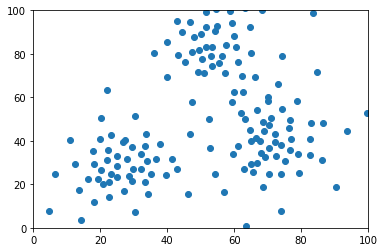

In [4]:
plt.scatter(data[:,0], data[:,1])
plt.axis([0, 100, 0, 100])
plt.show()

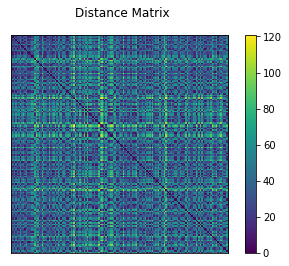

In [5]:
euclidean_dists = metrics.euclidean_distances(data)

def plot_distance_matrix(D):
    fig, ax = plt.subplots()
    image = ax.matshow(D)  #trace une image coloré-codé via un tableau de valeurs
    fig.colorbar(image)
    ax.set_xticks([])   #désactive les graduations de l'axe des x
    ax.set_yticks([])
    fig.suptitle('Distance Matrix')
    
plot_distance_matrix(euclidean_dists)

Create the K-Means Model

In [6]:
model = KMeans(n_clusters=3)

Fit the model

In [7]:
model.fit(data)

KMeans(n_clusters=3)

Predict the cluster of each element

In [8]:
clusters = model.predict(data)

Display the clusters

In [9]:
clusters

array([2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 0,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       1, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1,
       2, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2,
       1, 2, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1,
       0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 1])

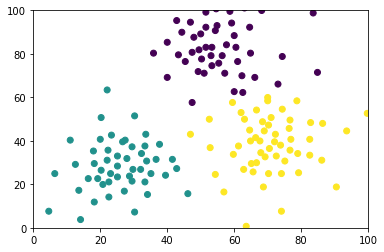

In [10]:
plt.scatter(data[:,0], data[:,1], c=clusters)
plt.axis([0, 100, 0, 100])
plt.show()

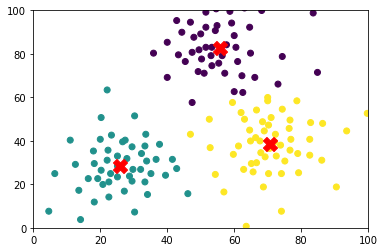

In [11]:
plt.scatter(data[:,0], data[:,1],  c=clusters)

centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x, centroids_y, marker='X', s=200, c='r')

plt.axis([0, 100, 0, 100])
plt.show()

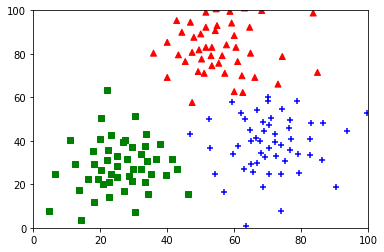

In [12]:
markers = '^s+'  #sélectionne les 3 types de marqueurs
colors = 'rgb'  #sélectionne les 3 couleurs de marqueurs

for i, m in enumerate(markers):
    points = (clusters == i)
    c = [colors[l] for l in clusters[points]]
    plt.scatter(data[points,0], data[points,1], c=c, marker=m)
plt.axis([0, 100, 0, 100])

plt.show()

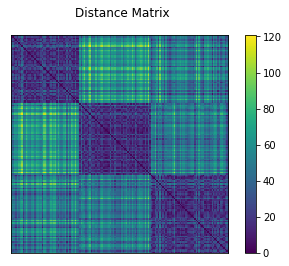

In [13]:
idx = np.argsort(clusters)

rearranged_dists = euclidean_dists[idx,:][:,idx]

plot_distance_matrix(rearranged_dists)

This matrix shows how 
- intra-class distance is low
- inter-class distance is high

In [14]:
data2 = data[idx]
idx

array([ 99, 100,  67,  35,  36,  92,  41,  43,  88,  46,  86,  85,  49,
        84,  51,  83,  53,  54,  55,  81,  57,  80,  60,  77, 148,  73,
        72,  69,  32, 101,  68, 103, 141,   6, 132,  10, 130, 127, 124,
       121, 117,  21,  16, 116, 105, 113, 112,  93, 145,  71, 144, 142,
       115, 137, 106,  79, 135, 110, 131,  90,  87, 129,  97, 126, 125,
       102,  95, 120,  74, 149,  39,   8,  23,  38,  11,  12,  34,  13,
        31,  14,  29,  15,  28,  26,  19,  24,   7,  44,  22,  61,  65,
        63,  52,   3,  62,   1, 118, 119, 147,  18, 122, 123,  17, 146,
         5,   2, 143, 128,   4, 140,   9, 139, 138, 133, 134, 136,  70,
       109, 114,  64,  75,  76,  78,  59,  58,  56,  82,  50,  48,  47,
        45,  89,  42,  91,  40,  94,  96,  37,  98,  33,  30, 104,  27,
       107, 108,  66, 111,  25,  20,   0], dtype=int64)

In [15]:
clusters2 = model.predict(data2)
clusters2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
print(centroids_x)
print(centroids_y)

[55.62465532 25.83987347 70.83571296]
[82.85734043 28.56227347 38.36182407]


In [17]:
model.predict([[10,10]])

array([1])